# (Project Loan Data Exploration )
## by (Xiangbo Wang)

## Preliminary Wrangling

> This dataset contains totally 113937 loans with 81 variables on each loan.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
loan.shape

(113937, 81)

In [4]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
loan['creation_date'] =pd.to_datetime(loan['ListingCreationDate']) #create a new series by changing'ListingCreatingDate' columns to Datetime Dtype

In [7]:
loan = loan[loan['creation_date']> '2009-07-01'] 
# prepare a new dataframe that has all the rows after 2009-07-01 because data prior to 2009-07-01 is not relevant to out analysis

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ListingKey                           84853 non-null  object        
 1   ListingNumber                        84853 non-null  int64         
 2   ListingCreationDate                  84853 non-null  object        
 3   CreditGrade                          0 non-null      object        
 4   Term                                 84853 non-null  int64         
 5   LoanStatus                           84853 non-null  object        
 6   ClosedDate                           26005 non-null  object        
 7   BorrowerAPR                          84853 non-null  float64       
 8   BorrowerRate                         84853 non-null  float64       
 9   LenderYield                          84853 non-null  float64       
 10  Estimated

In [9]:
loan['ProsperRating (Alpha)'].value_counts(dropna = False) 
#check if there is any missing values in ProsperRating(Alpha) to decide if this can be used to process our analysis.

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [10]:
cols = ['LoanOriginalAmount','Term','BorrowerAPR','StatedMonthlyIncome','ProsperRating (Alpha)','EmploymentStatus']
loan_clean = loan[cols] #creating a dataframe that contains all the needed columns and drop all other columns

In [11]:
list_sorted = ['AA', 'A', 'B','C','D','E','HR']#creating an order for Prosper Rating

In [12]:
loan_clean['ProsperRating (Alpha)'] = loan_clean['ProsperRating (Alpha)'].astype('category').cat.set_categories(list_sorted)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
loan_clean.sort_values(by=['ProsperRating (Alpha)'],inplace = True)# sort the values by the created list

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
loan_clean.head()

,LoanOriginalAmount,Term,BorrowerAPR,StatedMonthlyIncome,ProsperRating (Alpha),EmploymentStatus
6725,4000,36,0.10655,7500.000000,AA,Full-time
7596,10000,36,0.09837,5200.000000,AA,Employed
17554,30000,36,0.08930,10833.333333,AA,Employed
43539,20000,36,0.06828,9958.333333,AA,Employed
43527,6500,36,0.08829,1833.333333,AA,Employed


In [15]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 6725 to 67417
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   LoanOriginalAmount     84853 non-null  int64   
 1   Term                   84853 non-null  int64   
 2   BorrowerAPR            84853 non-null  float64 
 3   StatedMonthlyIncome    84853 non-null  float64 
 4   ProsperRating (Alpha)  84853 non-null  category
 5   EmploymentStatus       84853 non-null  object  
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 4.0+ MB


In [16]:
loan_clean.head()

,LoanOriginalAmount,Term,BorrowerAPR,StatedMonthlyIncome,ProsperRating (Alpha),EmploymentStatus
6725,4000,36,0.10655,7500.000000,AA,Full-time
7596,10000,36,0.09837,5200.000000,AA,Employed
17554,30000,36,0.08930,10833.333333,AA,Employed
43539,20000,36,0.06828,9958.333333,AA,Employed
43527,6500,36,0.08829,1833.333333,AA,Employed


In [17]:
loan_clean.describe()

,LoanOriginalAmount,Term,BorrowerAPR,StatedMonthlyIncome
count,84853.000000,84853.000000,84853.000000,8.485300e+04
mean,9083.440515,42.486135,0.226658,5.931175e+03
std,6287.860058,11.640346,0.079916,8.239944e+03
min,1000.000000,12.000000,0.045830,0.000000e+00
25%,4000.000000,36.000000,0.163280,3.434000e+03
50%,7500.000000,36.000000,0.219450,5.000000e+03
75%,13500.000000,60.000000,0.292540,7.083333e+03
max,35000.000000,60.000000,0.423950,1.750003e+06


In [18]:
loan_clean.isna().sum() # confirm the dataframe is ready to be analyzed.

LoanOriginalAmount       0
Term                     0
BorrowerAPR              0
StatedMonthlyIncome      0
ProsperRating (Alpha)    0
EmploymentStatus         0
dtype: int64

### What is the structure of your dataset?

> This dataset originally contains totally 113937 loans with 81 variables on each loan. After finished a few data cleaning process, the clean dataset is now contains 84853 loans with 5 variables which we will use for processing the main data analysis.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out the relationship between Borrower APR and other variables. In order to predit the APR for Borrower who enter a loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that LoanOriginalAmount has the strongest effect on loan's APR, the larger total loan amount, the lower APR. I also think that borrowers stated monthly income,loan term, prosper rating, employeement status will also affect the APR.

## Univariate Exploration

##### I will start looking of the distribution of the main variable of interest: Borrower APR

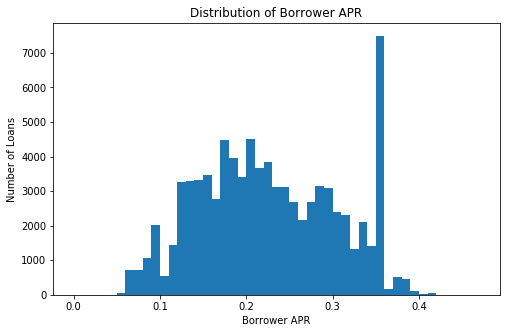

In [19]:
bins = np.arange(0, loan_clean.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_clean, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Number of Loans')
plt.title('Distribution of Borrower APR');

In [20]:
outliers = (loan_clean['BorrowerAPR']>0.35) & (loan_clean['BorrowerAPR']<0.36)
print(outliers.sum())

7488


In [21]:
loan_clean[loan_clean.BorrowerAPR>0.42]

,LoanOriginalAmount,Term,BorrowerAPR,StatedMonthlyIncome,ProsperRating (Alpha),EmploymentStatus
105889,1000,36,0.42395,2250.0,HR,Employed


The above graph shows most of the loans falls between APR rate 0.15 to 0.3, howerver there are around 7500 loans has rates from 0.35 and 0.36. And ther is only One borrower that has APR rate over 0.42.

##### Next, lets look at the first variable that affect the APR rate: Loan Original Amount

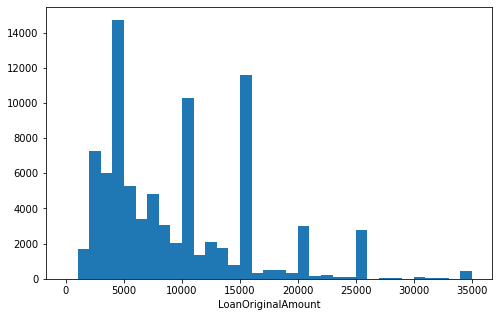

In [22]:
bins_1 = np.arange(0, loan_clean.LoanOriginalAmount.max()+1000, 1000)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_clean, x = 'LoanOriginalAmount', bins = bins_1);
plt.xlabel('LoanOriginalAmount');

We can see that most of the loan amounts falls under 5k,10k,15k,20k and 25k. Apart from that we can see that the number of loans increased from 0 to 5k, then it drops while the borrow amount increases. This tells us that people intern to borrow integer amount multiples of 5K.

##### Now, lets have a look of another variable : Stated Monthly Income

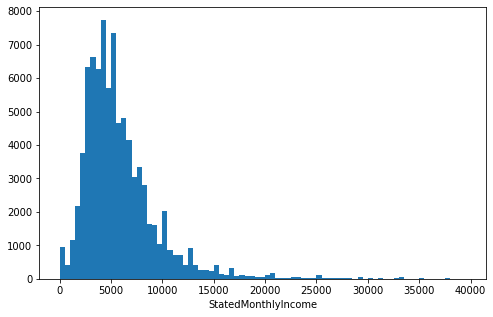

In [23]:
bins_2 = np.arange(0,40000, 500)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_clean, x = 'StatedMonthlyIncome', bins = bins_2);
plt.xlabel('StatedMonthlyIncome');

In [24]:
outliers_2 = loan_clean['StatedMonthlyIncome']>40000
print(outliers_2.sum()/loan_clean.shape[0])

0.0012963595865791426


This right-skewed distribution states that most borrower's monthly income is around 5k and the number drops rapidly when amount increases and only very small amount of borrower's has monthly income over 40k at around 0.1% of the dataset. 

##### I'll now move on to the other categories variables in the dataset: Term,ProsperRating and EmploymentStatus 

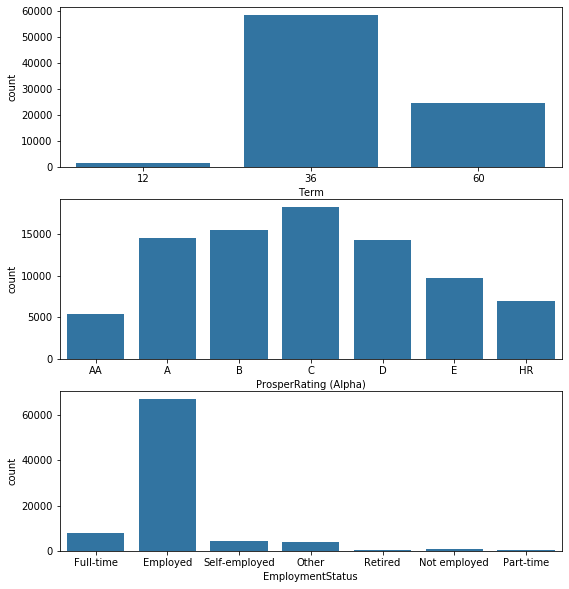

In [25]:
fig, ax = plt.subplots(nrows=3, figsize = [9,10])

default_color = sb.color_palette()[0]
sb.countplot(data = loan_clean, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = loan_clean, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = loan_clean, x = 'EmploymentStatus', color = default_color, ax = ax[2])

plt.show()

From top graphs, we can see that most loan terms fall under 36 months, most loan ratings are from grade A to C. Most borrowers have employment status as employed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the loans falls between APR rate 0.15 to 0.3, howerver there are around 7500 loans has rates from 0.35 and 0.36. And there is only One borrower that has APR rate over 0.42. To summary, the distribution is shown clearly on the current graph so transformation is not needed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution for stated monthly income is highly screwed to the right. Even though most of the borrowers have monthly income less than 15K, the number of borrowers who is over 40k can still not be able to ignored. So I had to make some changes on the graph bin arrange in order to see a clear distribution. The percentage of borrower who has monthly income overn 40k is 0.1% which I've decided to exclude it from the graph.

All the distributions for other variables are quite clear so the data adjustments are not required.

## Bivariate Exploration

##### To Start off with, I want to look at the pairwise correlations between numerical values and categorical values in the data.

In [26]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
cat_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']

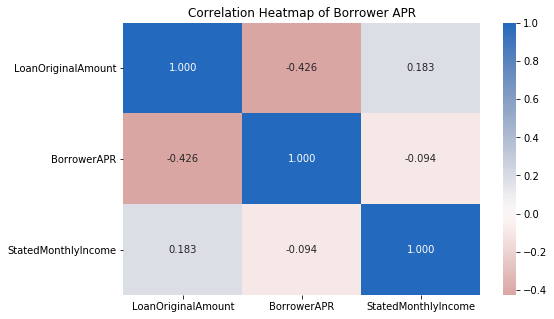

In [35]:
# correlation plot
plt.figure(figsize = [8,5])
sb.heatmap(loan_clean[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Heatmap of Borrower APR');
plt.show()

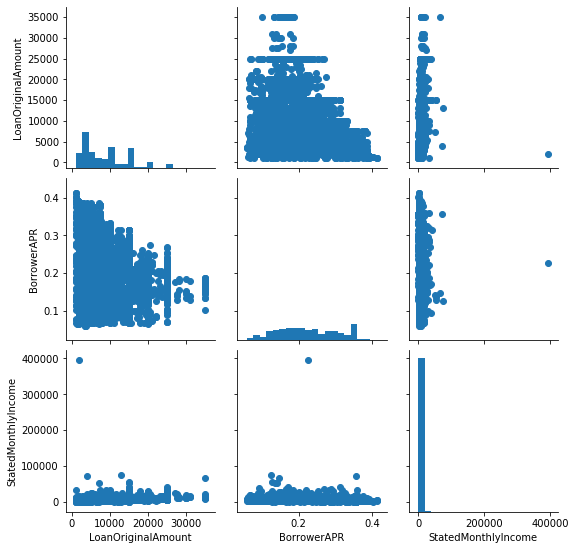

In [28]:
# plot matrix: sample 5000 loanss so that plots are clearer and they render faster
loan_clean_samp = loan_clean.sample(5000)

g = sb.PairGrid(data = loan_clean_samp, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

The Correlation Coefficient of borrower APR and Loan Original Amount is -0.426 which can be interpreted as low negative correlation. This means the more loan amount is, the lower the APR.However the relationship is not very strong. It is also interesting to see that the Correlation Coefficient between borrower APR and stated monthly income is -0.094. Which means that people normally believe the more monthly income stated can lower the APR but in fact it does not affect too much.

##### Let's move on to looking at how borrower APR, stated monthly income and loan original amount correlate with the categorical variables.

<Figure size 720x720 with 0 Axes>

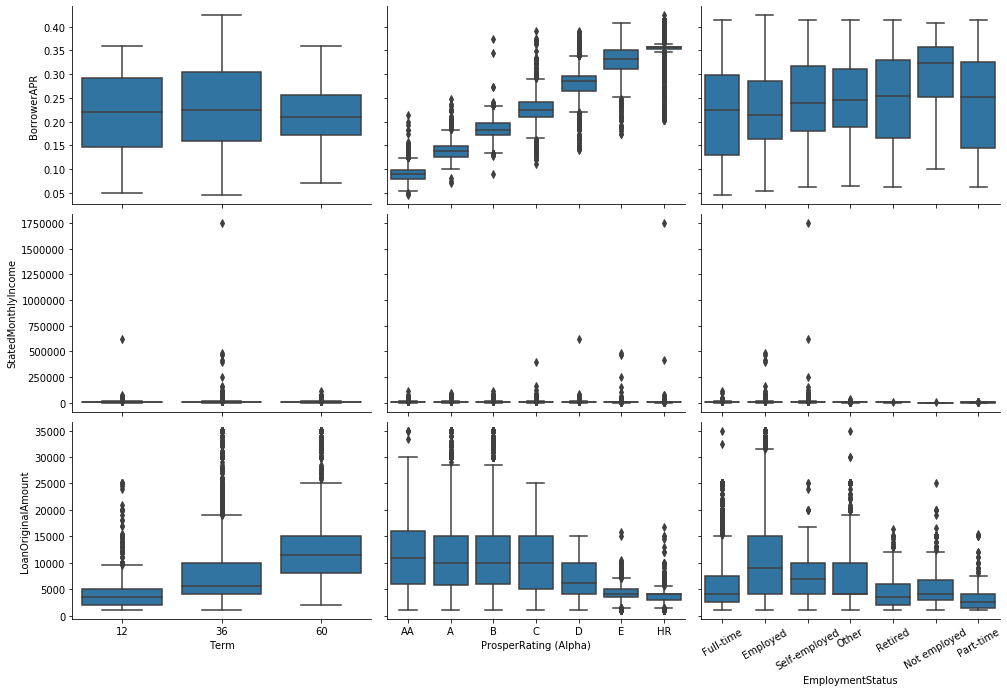

In [29]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_clean, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = cat_vars, height = 3, aspect = 1.5);
g.map(boxgrid);
plt.xticks(rotation=30);

The above graph shows that in general the more terms a loan have, the more original amount that borrower can have. However the trend does not apply for APR, when the terms come to 60, APR can drop a bit. When comes to Prosper Rating grade, it can be seen that Grade "AA" has the lowest APR on average and Grade"HR" has highest APR followed by Grade"E". Also borrower from grade"HR" and "E" mostly on has loan amount around 5k. As for employment Status, on average people with not employed has higher APR to people from other employeement status. Since the range form stated monthly income is too large and is not the main point to process analysis, this is not to be discussed in this section.

##### Finally, let's look at relationships between the three categorical features.

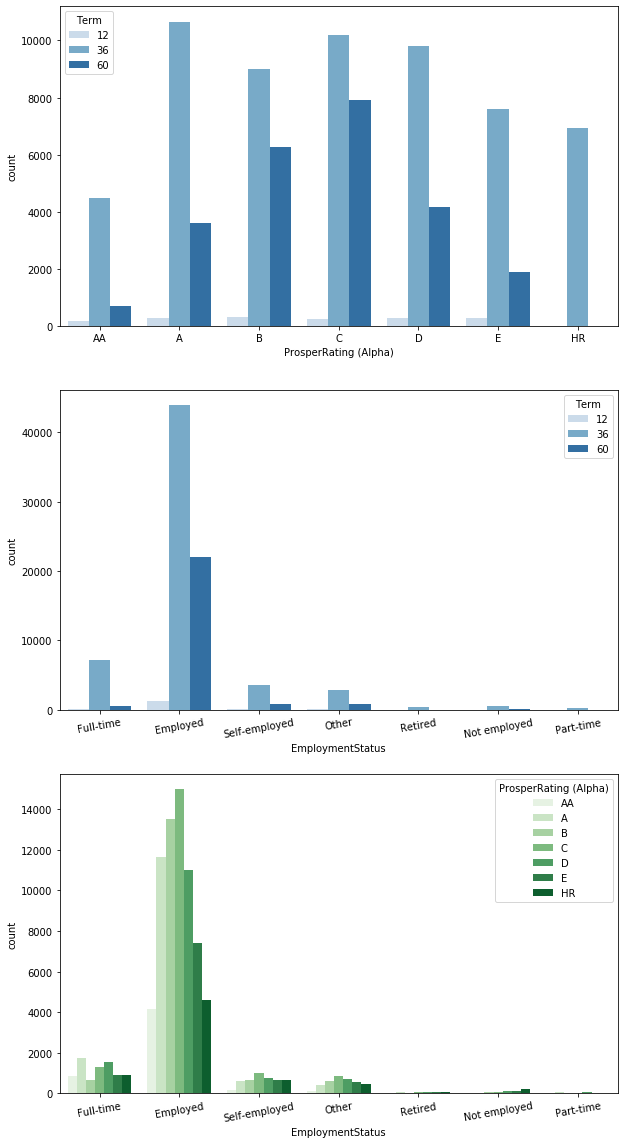

In [30]:
plt.figure(figsize = [10, 20])
# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sb.countplot(data = loan_clean, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_clean, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_clean, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
plt.xticks(rotation=10);

There are not much relationships can be found from terms and prosper ratings, it looks like 36 months terms is the most popular cross all different grades.Interestingly, grade "HR" only has 36 months terms where others has all different terms of loans applied. From the second graph, we can see that people with un-secured jobs(Not Employed, Retired, Part-time) tend to borrow loan in short term while people with secured jobs(Employed,Full-time,Self-employed) tend to borrow loan in medium to long terms on the other hand. It is also hardly to find a clear relationship between employment status and prosper Rating as they are spread out from different employment status.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this part, we can find that borrower APR and loan original amount has low negative correlation of -0.426.That means the the larger loan amount is, the lower APR is. Ther is also a negative correlation between APR and stated monthly income however the affect is so small that can be ignored. Some categorical variables can also affect APR rate, APR is highly depend on borrower's prosper rating grades, the higher the grade is, the lower the APR rate is. Employment Status is not affect APR too much but if borrower is unemployed, APR rate is on average higher than the other employment staus.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

From the heatmap, we can see that there is a positive relationship between stated monthly income and loan original amount with correlation of 0.183. However since the figure is too small, we can treat this as a very weak positive relationship. Form boxplot, We can also see that borrower apply long terms loan or has better prosper ratings tend to be able to borrower larger amount. It also applies to employment status, employed people can borrow larger amount on average than the others.

## Multivariate Exploration


>The main thing I want to explore in this part of the analysis is how the categorical variable (Prosper rating , Employmentstatus and term) play into the relationship between borrower APR and loan original amount.

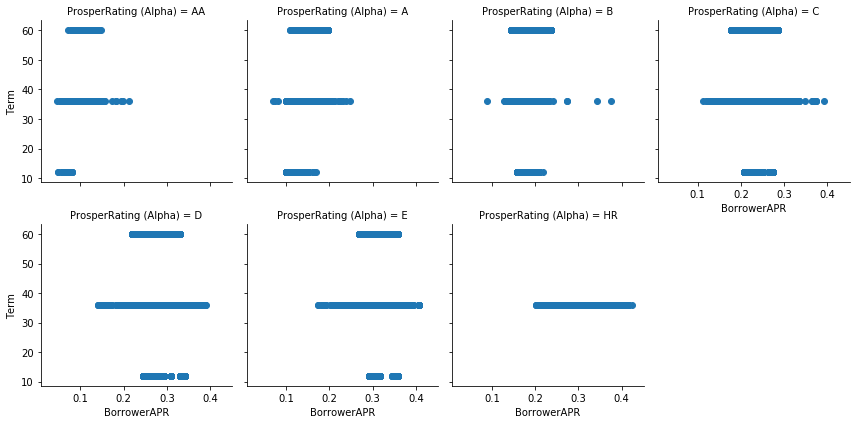

In [31]:
# Rating and Term effect on APR
g = sb.FacetGrid(data = loan_clean, col = 'ProsperRating (Alpha)', col_wrap = 4, height = 3)
g.map(plt.scatter,'BorrowerAPR', 'Term')
g.set_ylabels('Term')
g.set_xlabels('BorrowerAPR')
plt.show()

From top graph, we can clearly see APR rates increases when Rating Grades moves to the right. However, it can hardly see big affect on APR when loan terms change in each of the sub-graph, especially when borrowers has term 36 months, APR can be very in different rates regardless of Rating Grades. So we can see that Prosper Rating Grade has stronger affect on APR than loan terms.

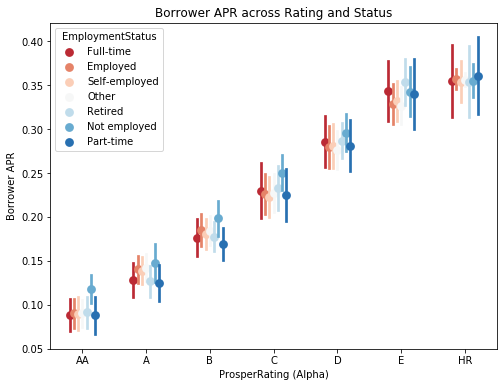

In [32]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_clean, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'EmploymentStatus',
           palette = 'RdBu', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Rating and Status')
plt.ylabel('Borrower APR');

It is insteresting to see that from Grade AA to Grade C, the APR rate for Not employed is slightly higher than the rest of the employment status. When prosper rating drops from Grade D to Grade HR, there is hardly difference can be found with APR rate among employment status.So we can see that Prosper Rating Grade has stronger affect on APR than employ status.  

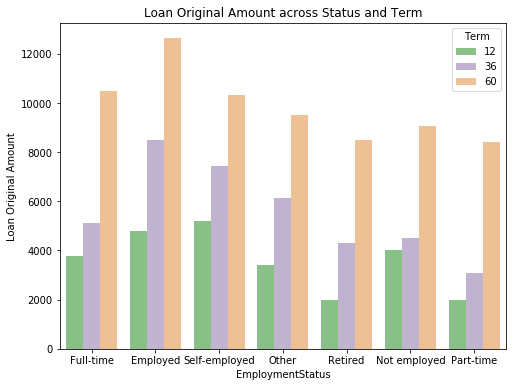

In [33]:
fig = plt.figure(figsize = [8,6])
ax = sb.barplot(data = loan_clean, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Accent', dodge = 0.4, ci= None)
plt.title('Loan Original Amount across Status and Term')
plt.ylabel('Loan Original Amount')
ax.set_yticklabels([],minor = True);

In general, we can see that when loan terms is larger, the loan original amount is larger. However, it is hardly to find any big changes on loan original amount across employment status. So we can say that terms has bigger affect on loan original amount than employment status.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this section, I have extented my investigation of the relationship between borrower APR to categorical variables. It turns out that prosper rating has the most affect on determine the borrower APR rate. The better the rating, the lower the APR.

### Were there any interesting or surprising interactions between features?

It is also interestingly find out that terms have a larger impact on loan original amount compare with employment status.